# AIDI 1002: Machine Learning Programming — Assignment - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, kstest
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Part 01 :

Consider the dataset ‘noisy_data.csv’ and apply the following pre-processing techniques and obtain the clean dataset.

1. Handling missing values by imputation (10 points)
2. Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the data (10 points)
3. Apply encodings for categorical variable and scale the features (10 points)

#### Load the dataset and display the data.

In [2]:
noisy = pd.read_csv('noisy_data.csv')

print("Original dataset:")
noisy

Original dataset:


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


#### Check for missing values

In [3]:
print("\nMissing values before imputation:")
noisy.isnull().sum()


Missing values before imputation:


Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

####  Assigning numerical and categorical columns separately.

In [4]:
numerical_col = noisy.select_dtypes(include=['float64', 'int64']).columns
categorical_col = noisy.select_dtypes(include=['object']).columns

####  Imputing missing values for numerical columns in dataset.

In [5]:
imputer = SimpleImputer(strategy='mean')
noisy[numerical_col] = imputer.fit_transform(noisy[numerical_col])

In [6]:
print("\nDataset after imputation:")
noisy


Dataset after imputation:


,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


#### Performing the normality tests

Column Age:
  Shapiro-Wilk Test Statistic: 0.9711920619010925
  p-value: 0.9016721248626709
  Data looks normally distributed (fail to reject H0)



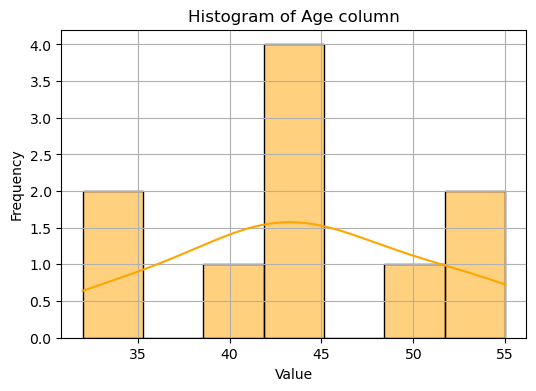

Column Income:
  Shapiro-Wilk Test Statistic: 0.9625768661499023
  p-value: 0.8148096203804016
  Data looks normally distributed (fail to reject H0)



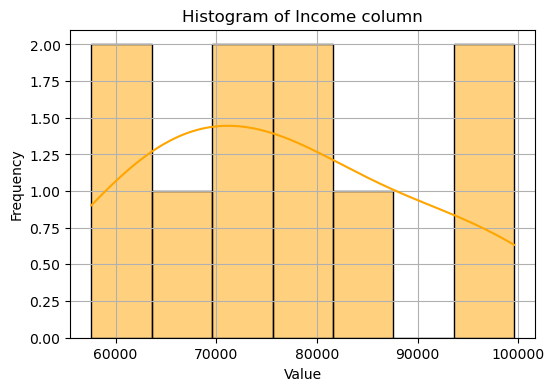

In [7]:
for column in numerical_col:
    stat, p = shapiro(noisy[column])
    print(f'Column {column}:')
    print('  Shapiro-Wilk Test Statistic:', stat)
    print('  p-value:', p)
    alpha = 0.05
    if p > alpha:
        print('  Data looks normally distributed (fail to reject H0)')
    else:
        print('  Data does not look normally distributed (reject H0)')
    print()
    
    
    plt.figure(figsize=(6, 4))
    sns.histplot(noisy[column], bins=7, color='orange', edgecolor='black', kde = True)
    plt.title(f'Histogram of {column} column')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Above we have print the test statistic, the p-value, and our conclusion based on the significance level (usually which is 0.05).

Null Hypothesis (H0): The data is normally distributed.

Alternative Hypothesis (H1): The data is not normally distributed.

Based on the p-values obtained from the Shapiro-Wilk test, if the p-value is greater than the defined significance level "0.05", fail to reject the null hypothesis and conclude that the data looks normally distributed. 

Else the p-value is less than the significance level, than reject the null hypothesis and conclude that the data does not look normally distributed.


#### Handle categorical columns using One-hot encoding

In [8]:
encoded_noisy_data = pd.get_dummies(noisy, columns=categorical_col)
encoded_noisy_data

,Age,Income,Region_Brazil,Region_India,Region_USA,Online Shopper_No,Online Shopper_Yes
0,49.000000,86400.000000,False,True,False,True,False
1,32.000000,57600.000000,True,False,False,False,True
2,35.000000,64800.000000,False,False,True,True,False
3,43.000000,73200.000000,True,False,False,True,False
4,45.000000,76533.333333,False,False,True,False,True
5,40.000000,69600.000000,False,True,False,False,True
6,43.777778,62400.000000,True,False,False,True,False
7,53.000000,94800.000000,False,True,False,False,True
8,55.000000,99600.000000,False,False,True,True,False
9,42.000000,80400.000000,False,True,False,False,True


#### Scale the features using StandardScaler

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_noisy_data)
scaled_data

array([[ 0.75887436,  0.74947325, -0.65465367,  1.22474487, -0.65465367,
         1.        , -1.        ],
       [-1.71150388, -1.43817841,  1.52752523, -0.81649658, -0.65465367,
        -1.        ,  1.        ],
       [-1.27555478, -0.89126549, -0.65465367, -0.81649658,  1.52752523,
         1.        , -1.        ],
       [-0.11302384, -0.25320042,  1.52752523, -0.81649658, -0.65465367,
         1.        , -1.        ],
       [ 0.17760889,  0.        , -0.65465367, -0.81649658,  1.52752523,
        -1.        ,  1.        ],
       [-0.54897294, -0.52665688, -0.65465367,  1.22474487, -0.65465367,
        -1.        ,  1.        ],
       [ 0.        , -1.0735698 ,  1.52752523, -0.81649658, -0.65465367,
         1.        , -1.        ],
       [ 1.34013983,  1.38753832, -0.65465367,  1.22474487, -0.65465367,
        -1.        ,  1.        ],
       [ 1.63077256,  1.75214693, -0.65465367, -0.81649658,  1.52752523,
         1.        , -1.        ],
       [-0.25834021,  0.2937

#### Convert scaled data back to DataFrame

In [10]:
scaled_noisy = pd.DataFrame(scaled_data, columns=encoded_noisy_data.columns)
scaled_noisy

,Age,Income,Region_Brazil,Region_India,Region_USA,Online Shopper_No,Online Shopper_Yes
0,0.758874,0.749473,-0.654654,1.224745,-0.654654,1.0,-1.0
1,-1.711504,-1.438178,1.527525,-0.816497,-0.654654,-1.0,1.0
2,-1.275555,-0.891265,-0.654654,-0.816497,1.527525,1.0,-1.0
3,-0.113024,-0.253200,1.527525,-0.816497,-0.654654,1.0,-1.0
4,0.177609,0.000000,-0.654654,-0.816497,1.527525,-1.0,1.0
5,-0.548973,-0.526657,-0.654654,1.224745,-0.654654,-1.0,1.0
6,0.000000,-1.073570,1.527525,-0.816497,-0.654654,1.0,-1.0
7,1.340140,1.387538,-0.654654,1.224745,-0.654654,-1.0,1.0
8,1.630773,1.752147,-0.654654,-0.816497,1.527525,1.0,-1.0
9,-0.258340,0.293712,-0.654654,1.224745,-0.654654,-1.0,1.0


# 

## Part 02 :

Consider the text present in the file ‘wiki.txt’ and Answer the following questions :

1. Write a program to convert following text into tokens with two tokenization methods such as ‘RegexpTokenizer()’ and ‘word_tokenize()’ from NLTK library. (Note :The tokens should not have stop words and punctuation symbols. Feel free to decide about the correct list of stop words; e.g., negative words (don’t) could be important for you. Execute both methods of tokenization along with your code of removing stop words and punctuation.) (10 points)
2. Write a regular expression to extract all the year mentions in the ‘wiki.txt’ file. (10 points)
3. State the differences observed in the output of tokenization methods. (10 points)

In [11]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
import string

#### Download NLTK resources ("punkt" and "stopwords")

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhavinpatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhavinpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Read the text content from the file

In [13]:
with open('wiki.txt', 'r') as file:
    wiki = file.read()
    print(wiki)

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted "blocks worlds"

#### For removing the stop words, and punctuation_symbols

In [14]:
stop_words = set(stopwords.words('english'))

#punctuation_symbols = set(string.punctuation)
punctuation_symbols = {'.', ',', ';', ':', '?', '!', '-', '_', '(', ')', '[', ']', '{', '}', '/', '\\', '"', "'", "`","''", '``'}
print(punctuation_symbols, '\n')
print(stop_words)

{'.', '"', '}', ':', '-', ';', '?', "'", '{', '!', "''", '``', '\\', '_', '(', '[', ',', ')', ']', '`', '/'} 

{"didn't", 'yourselves', 'at', 'so', 'my', 'out', 'does', 'all', 'haven', 'just', 'these', 'how', 're', 'off', 'above', 'he', 'while', 'both', 'wasn', 'down', 'itself', 'into', 'd', 'with', 'm', 'don', 'on', 'each', 'having', 'shan', 'needn', 'by', 'had', 'be', 'you', "won't", 'couldn', "shan't", 'its', 'most', 'was', 'the', 'didn', 'shouldn', 'as', 's', "you'll", 'those', 'before', 'if', 'any', 'y', 'no', 'this', 'about', 'of', "should've", 'mustn', "hasn't", 'further', 'isn', 'why', 'their', 'do', 'can', 'did', 'herself', "needn't", 'i', 'because', 'me', 'it', 'very', "wasn't", 'ourselves', 'once', 'were', 'to', 't', 'ain', "hadn't", 'through', 'there', 'him', "that'll", 'yours', 'below', 'an', 'not', 'will', 'your', "it's", 'who', 'here', 'a', 'some', 'doing', 'wouldn', 'then', "you'd", 'hasn', 'when', 'am', 'but', 'theirs', 'hadn', 'now', 'between', 'more', "shouldn't", 't

#### Tokenization the content using RegexpTokenizer

In [15]:
ret_tokenizer = RegexpTokenizer(r'\w+')
regexp_tokens = ret_tokenizer.tokenize(wiki)
print(regexp_tokens)

['The', 'history', 'of', 'NLP', 'generally', 'started', 'in', 'the', '1950s', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', 'In', '1950', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', 'Computing', 'Machinery', 'and', 'Intelligence', 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', 'The', 'Georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'Russian', 'sentences', 'into', 'English', 'The', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '2', 'However', 'real', 'progress', 'was', 'much', 'slower', 'and', 'after', 'the', 'ALPAC', 'report', 'in', '1966', 'which', 'found', 'that', 'ten', 'year', 'long', 'research', 'had', 'failed', 'to', 'fulfill', 'the', 'expectations', 'funding', 'for', 'machine', 'translation', 'was', 'd

In [16]:
filtered_tokens_regexp = [token for token in regexp_tokens if token.lower() not in stop_words]

print("Tokens after applying RegexpTokenizer and removing stop words & punctuation symbols:", '\n')
print(filtered_tokens_regexp)

Tokens after applying RegexpTokenizer and removing stop words & punctuation symbols: 

['history', 'NLP', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'Alan', 'Turing', 'published', 'article', 'titled', 'Computing', 'Machinery', 'Intelligence', 'proposed', 'called', 'Turing', 'test', 'criterion', 'intelligence', 'Georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'Russian', 'sentences', 'English', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem', '2', 'However', 'real', 'progress', 'much', 'slower', 'ALPAC', 'report', '1966', 'found', 'ten', 'year', 'long', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'Little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', 'notably', 'succes

####  Tokenization using word_tokenize

In [17]:
word_tokenizer = word_tokenize(wiki)

print(word_tokenizer)

['The', 'history', 'of', 'NLP', 'generally', 'started', 'in', 'the', '1950s', ',', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', '.', 'In', '1950', ',', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', '``', 'Computing', 'Machinery', 'and', 'Intelligence', "''", 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', '.', 'The', 'Georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'Russian', 'sentences', 'into', 'English', '.', 'The', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', ',', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '.', '[', '2', ']', 'However', ',', 'real', 'progress', 'was', 'much', 'slower', ',', 'and', 'after', 'the', 'ALPAC', 'report', 'in', '1966', ',', 'which', 'found', 'that', 'ten-year-long', 'research', 'had', 'failed', 'to', 'fulfill', 'the', 'ex

In [18]:
filtered_word_tokens = [token for token in word_tokenizer if token.lower() not in stop_words 
                        and token not in punctuation_symbols]

print("\nTokens after applying word_tokenize, removing stop and words punctuation symbols for text:", '\n')
print(filtered_word_tokens)


Tokens after applying word_tokenize, removing stop and words punctuation symbols for text: 

['history', 'NLP', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'Alan', 'Turing', 'published', 'article', 'titled', 'Computing', 'Machinery', 'Intelligence', 'proposed', 'called', 'Turing', 'test', 'criterion', 'intelligence', 'Georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'Russian', 'sentences', 'English', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem', '2', 'However', 'real', 'progress', 'much', 'slower', 'ALPAC', 'report', '1966', 'found', 'ten-year-long', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'Little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', 'notably', 'succe

While tokenizing the text using word_tokenize method observed that it punctuations are treated as words so we need to remove all of them maually.

while in RegexpTokenizer method there is no need to remove the tokens sperately.

#### Regular expression pattern to extract all the year mentions text document 

In [19]:
pattern = r'\b\d{4}s?\b'

years = set(re.findall(pattern, wiki))


print("Years mentioned in the text:")
print(years)


Years mentioned in the text:
{'1950s', '1966', '1954', '1960s', '1980s', '1950', '1964'}


1. Handling of Punctuation:

As i mention above that, 

word_tokenize(): Punctuation symbols are treated as separate tokens by default, just like words, and they are included in the output tokens.

RegexpTokenizer(): Typically, punctuation symbols are treated as separate tokens, so they are not included in the output tokens.

2. Flexibility:

RegexpTokenizer(): Provides more flexibility than "word_tokenize()" in defining tokenization patterns using regular expressions. You can specify complex patterns to tokenize the text according to specific requirements.

Where, word_tokenize(): Provides a simple interface for tokenization without the need to define custom patterns. It uses a pre-trained tokenizer that handles common tokenization scenarios effectively.

3. Stop Words Handling:

Both tokenization approaches can be coupled with stop word removal, although the specific implementation may differ. In the given example, we intentionally need to eliminated stop words after tokenization.

Stop words removal is an important preprocessing step in many NLP projects since it eliminates frequently recurring words that have no significant meaningful value. The presence or absence of stop words in output tokens might influence downstream tasks such as text classification, sentiment analysis, and so on.

4. Output Format:

RegexpTokenizer() returns tokens based on the patterns supplied in the regular expression used for tokenization.

Word_tokenize() returns tokens based on the default tokenization rules used in NLTK, which use whitespace and punctuation symbols as token separators.

----------------------------------------------------------------------------------------------------------------------------

# 

## Part 03 :

Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home) and answer the following questions :

1. Apply the feature selection techniques over the melbourne-housing -dataset namely (20 points):

∗ Correlation

∗ Chi-Square

∗ Mutual-Information

∗ Random Forest feature importance

2. Compare the importance of selected features using bar chart (10 points).
3.  Comment on the results obtained from various feature selection techniques and which is the best and worst feature selection selection technique on the given dataset (10 points).

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#### Load the dataset displaying the first fev rows.

In [22]:
melb = pd.read_csv('melb_data.csv')
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


#### Display all hidden columns.

In [23]:
pd.set_option('display.max_columns', 21)
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


#### statistical information

In [24]:
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [25]:
print("Shape of actual data : ", melb.shape)

Shape of actual data :  (13580, 21)


#### Check for null values.

In [26]:
melb.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

#### Handeling missing values, by droping the rows with missing values

In [27]:
mhs = melb.dropna()
print("shape of dataset after dropping the missing values : ", mhs.shape)

shape of dataset after dropping the missing values :  (6196, 21)


In [28]:
data_loss=(13580-6196)/13580*100 
# 13580 (number of rows in the original dataframe) and 6196 (number of rows after removing the missing/null values)
print("Data loss : ", data_loss)

Data loss :  54.3740795287187


#### Encode the categorical variables.

In [29]:
label_encoder = LabelEncoder()
for col in mhs.select_dtypes(include='object').columns:
    mhs[col] = label_encoder.fit_transform(mhs[col])

mhs

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,0,2790,2,0,1035000.0,1,18,41,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,29,-37.80790,144.99340,2,4019.0
2,0,4520,3,0,1465000.0,3,18,42,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,29,-37.80930,144.99440,2,4019.0
4,0,4882,4,0,1600000.0,4,112,43,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,29,-37.80720,144.99410,2,4019.0
6,0,1027,3,0,1876000.0,1,112,46,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,29,-37.80240,144.99930,2,4019.0
7,0,6101,2,0,1636000.0,1,112,50,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,29,-37.80600,144.99540,2,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,278,3461,3,0,601000.0,1,145,36,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,27,-37.51232,145.13282,3,2170.0
12206,279,5563,3,0,1050000.0,4,189,36,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,10,-37.86558,144.90474,6,6380.0
12207,279,2151,1,2,385000.0,3,189,36,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,10,-37.85588,144.89936,6,6380.0
12209,281,2411,2,2,560000.0,0,196,36,4.6,3181.0,2.0,1.0,1.0,0.0,61.60,2012.0,25,-37.85581,144.99025,5,4380.0


#### Spliting data into features("all columns expect 'Price' column") and target ('Price')

In [30]:
X = mhs.drop(columns=['Price'])
y = mhs['Price']

#### Split the data into training and testing sets(80,20)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=657)
print("Training set:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)


print("\nTesting set:")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Training set:
X_train shape: (4956, 20)
Y_train shape: (4956,)

Testing set:
X_test shape: (1240, 20)
Y_test shape: (1240,)


# 

#### 1. Correlation-based feature selection

#### Correlation heatmap

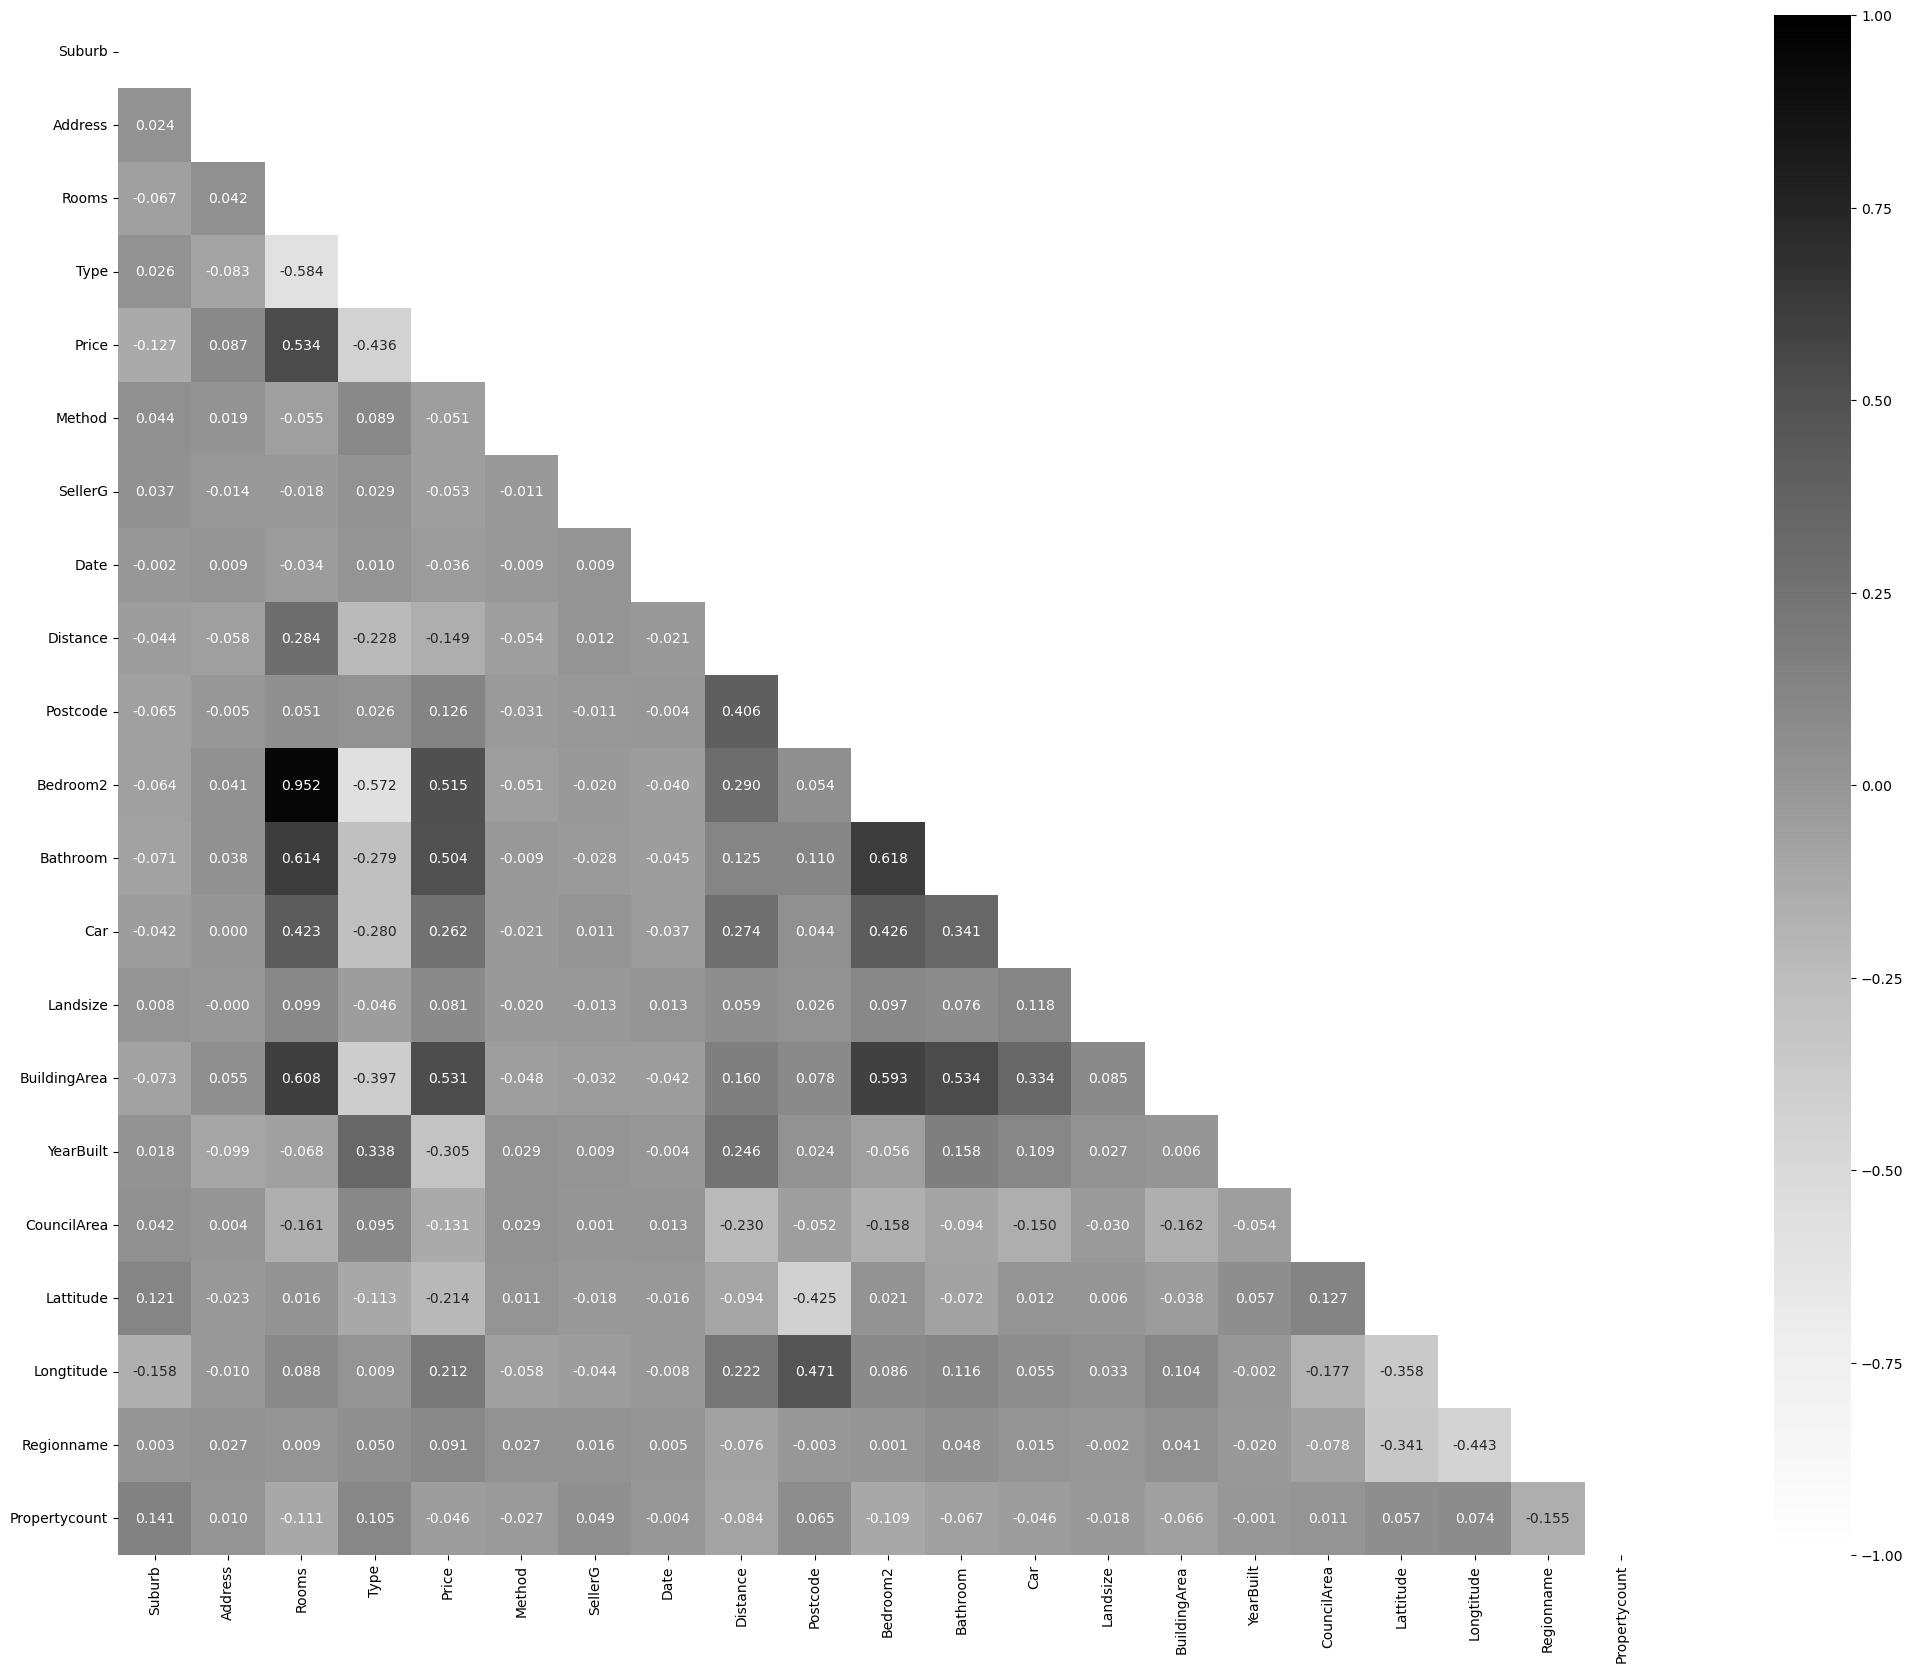

In [32]:
left_traingle = np.triu(mhs.corr())
plt.figure(figsize=(30, 20))
sns.heatmap(mhs.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Greys", mask=left_traingle)
plt.show()

In [33]:
correlation_matrix = mhs.corr()
correlation_features = abs(correlation_matrix['Price']).sort_values(ascending=False).index
correlation_features = correlation_features[1:11] 
print("Correlation-based selected features:", '\n')
print("\nSelected Features : ", correlation_features)


Correlation-based selected features: 


Selected Features :  Index(['Rooms', 'BuildingArea', 'Bedroom2', 'Bathroom', 'Type', 'YearBuilt',
       'Car', 'Lattitude', 'Longtitude', 'Distance'],
      dtype='object')


In [34]:
correlation_scores = [correlation_matrix.loc['Price', feature] for feature in correlation_features]
print(correlation_scores)

[0.5335053562308817, 0.530573780230247, 0.5145614903495774, 0.5039224716758195, -0.43626165330550015, -0.3046325343218133, 0.2615067274723961, -0.2135739108481014, 0.21175974068006778, -0.14886684630931982]


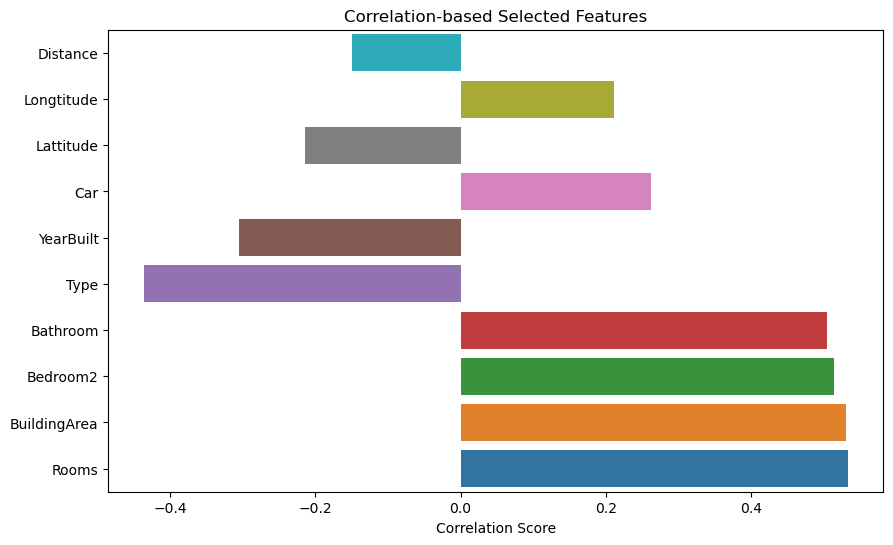

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_scores, y=correlation_features)
plt.xlabel('Correlation Score')
plt.title('Correlation-based Selected Features')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

# 

#### 2. Chi-Square feature selection

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

chi_square_selector = SelectKBest(score_func=chi2, k=10)
chi_square_selector.fit(X_train_scaled, Y_train)
chi_square_support = chi_square_selector.get_support()
chi_square_feature = X_train.loc[:, chi_square_support].columns.tolist()

print("Features selection using Chi-Square", '\n')
print("\nSelected Features : ", chi_square_feature)

Features selection using Chi-Square 


Selected Features :  ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Bathroom', 'CouncilArea', 'Regionname']


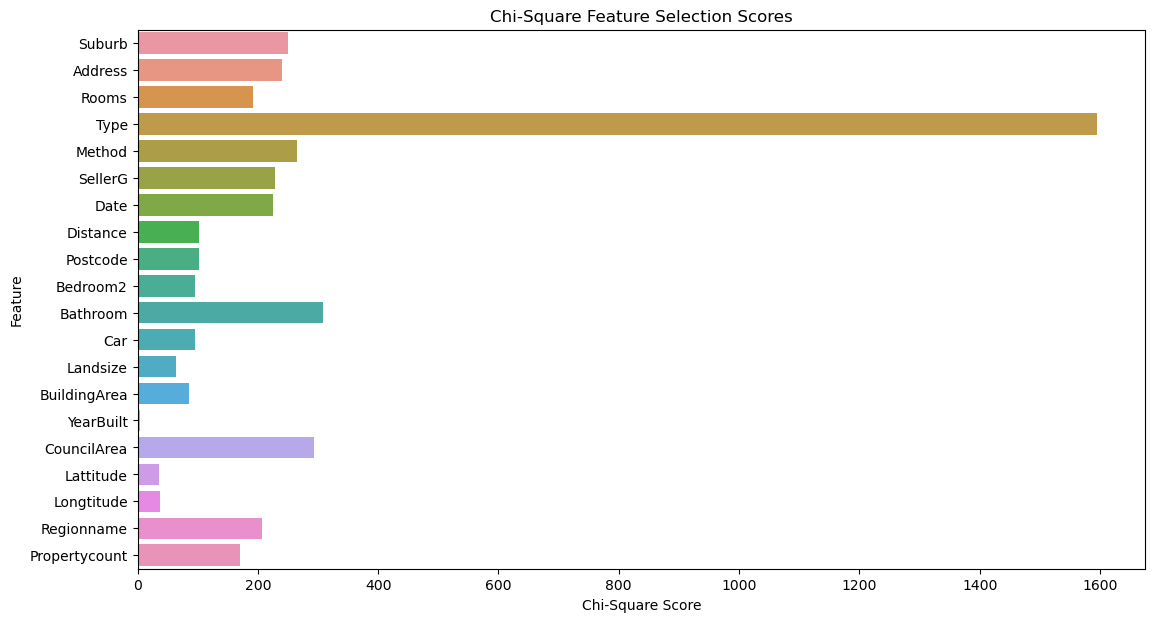

In [37]:
scores = chi_square_selector.scores_
feature_names = X_train.columns

plt.figure(figsize=(13, 7))
sns.barplot(x=scores, y=feature_names)
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.title('Chi-Square Feature Selection Scores')
plt.show()

# 

#### 3. Mutual Information feature selection

In [38]:
mutual_selector = SelectKBest(score_func=mutual_info_classif, k=10)
mutual_selector.fit(X_train, Y_train)
mutual_support = mutual_selector.get_support()
mutual_feature = X_train.loc[:, mutual_support].columns.tolist()

print(" Features selection using mutual Information  :", '\n')
print("\nSelected Features : ", mutual_feature)

 Features selection using mutual Information  : 


Selected Features :  ['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname']


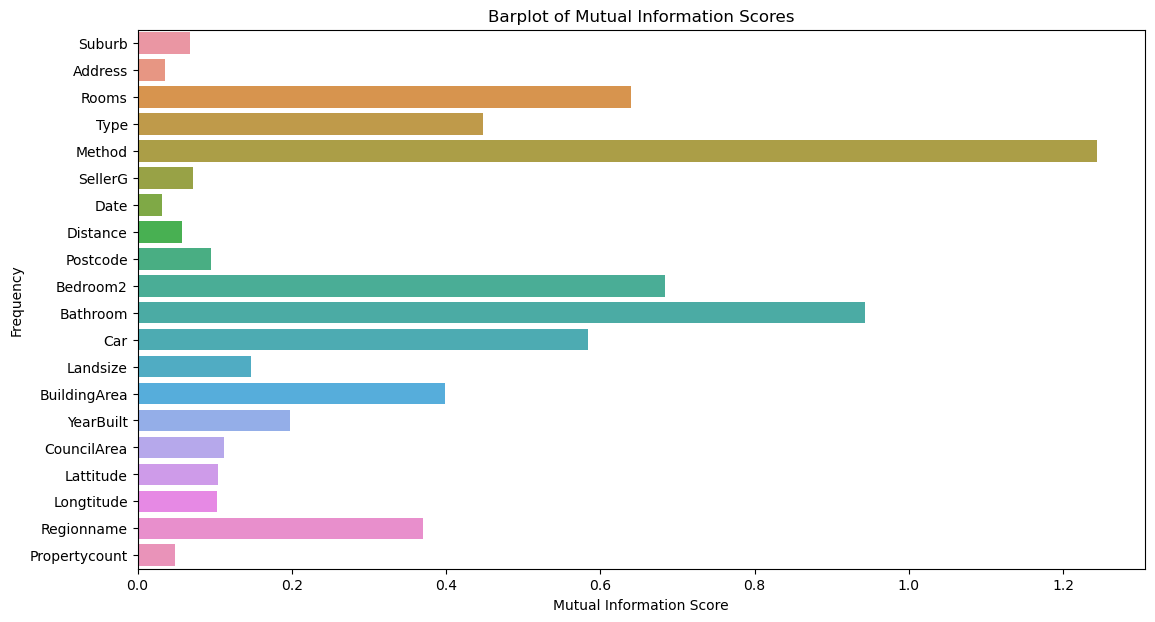

In [39]:
mutual_scores = mutual_selector.scores_

plt.figure(figsize=(13, 7))
sns.barplot(x=mutual_scores, y=feature_names)
plt.xlabel('Mutual Information Score')
plt.ylabel('Frequency')
plt.title('Barplot of Mutual Information Scores')
plt.show()

# 

#### 4. Random Forest feature importance

In [40]:
random_forest_selector = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_selector.fit(X_train, Y_train)
random_forest_feature_importances = pd.Series(random_forest_selector.feature_importances_, index=X_train.columns).sort_values(ascending=False)
random_forest_features = random_forest_feature_importances.index[:10]

print("Random Forest selected features:", '\n')
print("\nSelected Features : ", random_forest_features)


Random Forest selected features: 


Selected Features :  Index(['BuildingArea', 'Distance', 'YearBuilt', 'Lattitude', 'Postcode',
       'Landsize', 'Longtitude', 'Bathroom', 'Address', 'Type'],
      dtype='object')


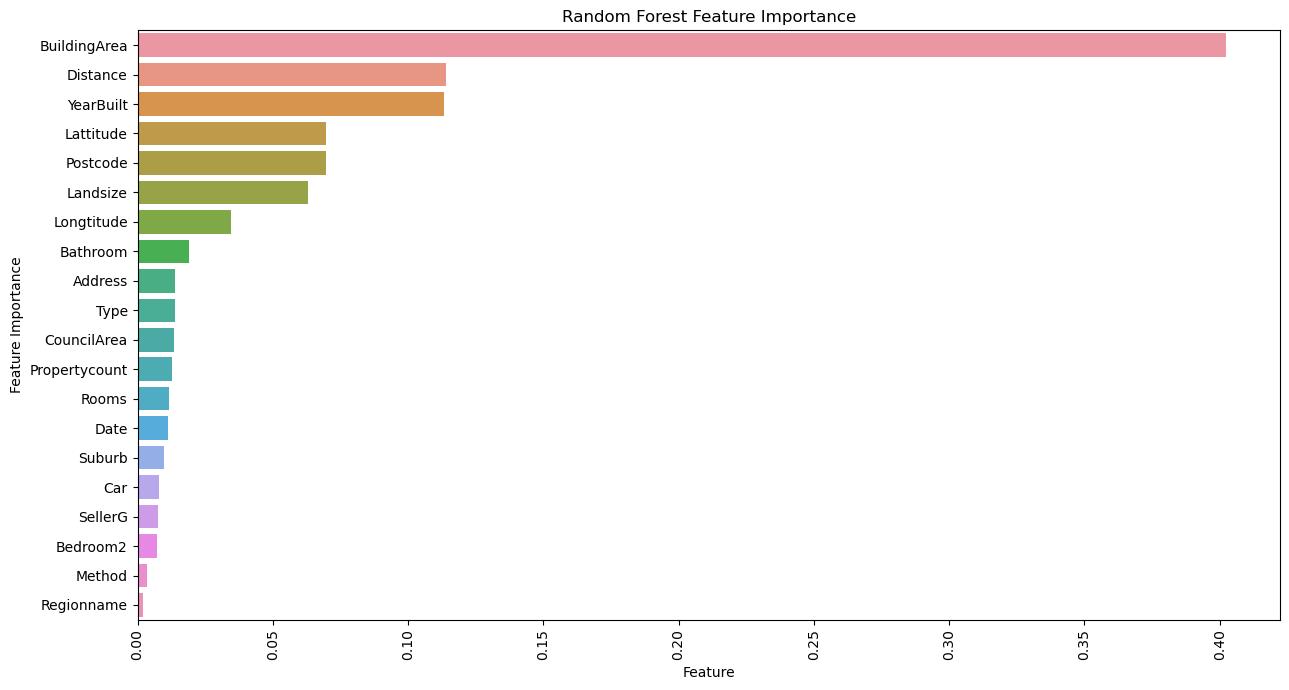

In [41]:
importances = random_forest_selector.feature_importances_

feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

plt.figure(figsize=(13, 7))
sns.barplot(y=[feature_names[i] for i in indices], x=importances[indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# 

#### Storing selected important feature in dataframe obtained from different feature selection method.

In [42]:
all_feature_importance = pd.DataFrame({
    'Feature': ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10'],
    'Correlation': correlation_features[:10],
    'Chi-Square': chi_square_feature[:10],  
    'Mutual Information': mutual_feature[:10],  
    'Random Forest': random_forest_features[:10]  
})

all_feature_importance


,Feature,Correlation,Chi-Square,Mutual Information,Random Forest
0,Feature 1,Rooms,Suburb,Rooms,BuildingArea
1,Feature 2,BuildingArea,Address,Type,Distance
2,Feature 3,Bedroom2,Rooms,Method,YearBuilt
3,Feature 4,Bathroom,Type,Bedroom2,Lattitude
4,Feature 5,Type,Method,Bathroom,Postcode
5,Feature 6,YearBuilt,SellerG,Car,Landsize
6,Feature 7,Car,Date,Landsize,Longtitude
7,Feature 8,Lattitude,Bathroom,BuildingArea,Bathroom
8,Feature 9,Longtitude,CouncilArea,YearBuilt,Address
9,Feature 10,Distance,Regionname,Regionname,Type


In [43]:
all_feature_importance.describe()

,Feature,Correlation,Chi-Square,Mutual Information,Random Forest
count,10,10,10,10,10
unique,10,10,10,10,10
top,Feature 1,Rooms,Suburb,Rooms,BuildingArea
freq,1,1,1,1,1


Here we have performed the 4 different types of feature importance methods :

∗ Correlation

∗ Chi-Square

∗ Mutual-Information

∗ Random Forest feature importance

The feature selection strategies used on the Melbourne housing dataset provide insights into the value of various parameters and their correlations with the target variable, "Price".

Correlation:
Correlation analysis identifies linear correlations between characteristics and the target variable. Features with high positive or negative correlations are deemed significant.
Correlation-wise, the greatest features are those with the highest positive correlation values with the goal variable "Price".
The weakest features have low correlation coefficients near 0.


Chi-Square:
Chi-square tests are normally employed for categorical target variables, but "Price" in our dataset is continuous. Hence, chi-square isn't immediately applicable here.


Mutual Information:
Mutual information describes both linear and nonlinear interactions between characteristics and the goal variable.
Features that are high mutual information scores are regarded crucial since they provide additional information about the target variable.
The worst features have low mutual information scores near zero.


Random Forest Feature Importance:
Random Forest feature importance assesses the reduction in impurity or improvement in accuracy when a feature is utilized to separate the data.
Features with high significance ratings are considered relevant in predicting the target variable.
Low importance ratings are associated with the most negative traits.
Comparing these strategies, we may draw conclusions about the best and worst feature selection techniques for the Melbourne housing dataset:


Best Feature Selection Technique:
Based on the nature of the problem and the dataset characteristics, the best feature selection strategy is likely to be Random Forest or Mutual 
Information.


Feature significance.
Mutual Information successfully captures both linear and nonlinear interactions, providing a comprehensive perspective of feature relevance.
Random Forest Feature Importance provides a reliable way for identifying essential features, particularly in complicated datasets with non-linear correlations.


Worst Feature Selection Technique:
Chi-Square is the poorest feature selection strategy in this scenario since it is incompatible with continuous target variables such as "Price".
However, if Chi-Square were used, its effectiveness may be limited due to its emphasis on categorical data and independence assumptions.
Ultimately, the optimum feature selection technique is determined by the dataset's properties, the correlations between features and the target variable, and the problem's specific requirements. In this scenario, given the nature of Melbourne housing dataset.Mutual Information or Random Forest Feature Importance are more likely to find key factors for predicting house values.
